<a href="https://colab.research.google.com/github/iampankajchari/ML-Class-Project/blob/main/ML_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset_link="https://raw.githubusercontent.com/Afsaan/sensor_fault_detection/main/data/train.csv"
df=pd.read_csv(dataset_link,na_values="na")
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [5]:
df.isnull().sum()

class         0
aa_000        0
ab_000    27896
ac_000     2141
ad_000     9200
          ...  
ee_007      379
ee_008      379
ee_009      379
ef_000     1730
eg_000     1729
Length: 171, dtype: int64

In [6]:
df.shape

(36188, 171)

In [8]:
#check the unique value in class
df['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

In [12]:
# define numerical and categorical columns
numeric_feature=[feature for feature in df.columns if df[feature].dtype!='0']
cat_feature=[feature for feature in df.columns if df[feature].dtype=='0']
print(len(numeric_feature))
print(len(cat_feature))


171
0


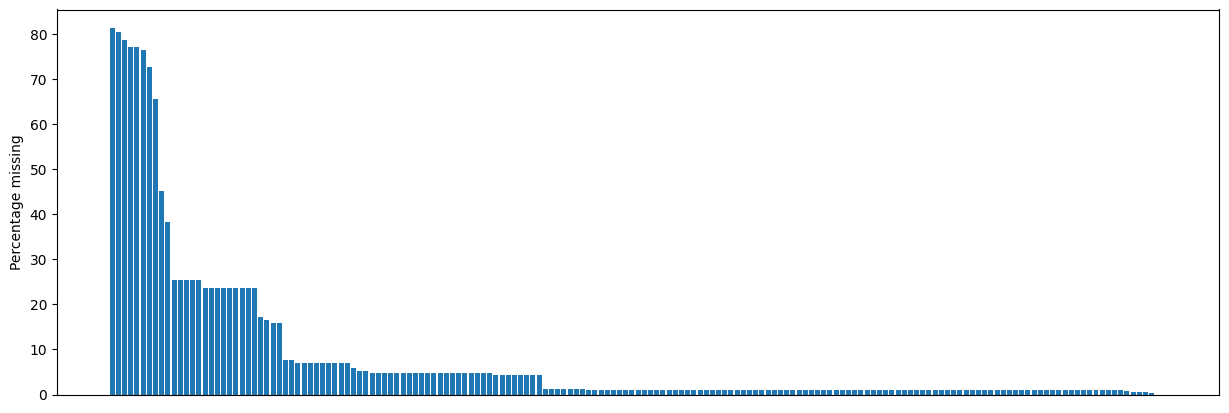

In [26]:
#check the missing values in class
fig, ax =plt.subplots(figsize=(15,5))
missing=df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending=False)
ax.bar(missing.index,missing.values.T[0])
plt.xticks([])
plt.ylabel('Percentage missing')
plt.show()


,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
...,...
cj_000,0.560959
ci_000,0.560959
bt_000,0.237648
aa_000,0.000000


In [27]:
# drop columns which has more than 70% of missing values

dropcols=missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [28]:
dropcols.index

Index(['br_000', 'bq_000', 'bp_000', 'ab_000', 'cr_000', 'bo_000', 'bn_000'], dtype='object')

In [31]:
df.drop(dropcols.index,axis=1,inplace=True)
df

KeyError: "['br_000', 'bq_000', 'bp_000', 'ab_000', 'cr_000', 'bo_000', 'bn_000'] not found in axis"

In [32]:
df.shape

(36188, 164)

In [49]:
missing2=df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending=False)
missing2

,0
bm_000,65.518957
bl_000,45.139273
bk_000,38.197745
cf_000,25.422792
co_000,25.422792
...,...
cj_000,0.560959
ci_000,0.560959
bt_000,0.237648
aa_000,0.000000


In [48]:
missing2[missing2[0]!=0].sum().div(missing2.shape[0]).mul(100)

0    537.059853
dtype: float64

In [50]:
missing2.shape[0]

164

In [52]:
df.isnull().sum()

class        0
aa_000       0
ac_000    2141
ad_000    9200
ae_000    1587
          ... 
ee_007     379
ee_008     379
ee_009     379
ef_000    1730
eg_000    1729
Length: 164, dtype: int64

In [55]:
missing2[missing2[0]!=0].mean()

0    5.436902
dtype: float64